In [167]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import stats
from sklearn import svm

rcParams['figure.figsize'] = 6, 4

## Task 1 (5+5+5+5+5=25 pts)

### Consider the dataset HW2_task1.csv, a binary classification problem with two real-valued input attributes.  As you can see from the plot, the dataset is linearly separable. Train a linear SVM (setting C=100000 just to emphasize that no slack variables are allowed) and  answer the following five questions: 

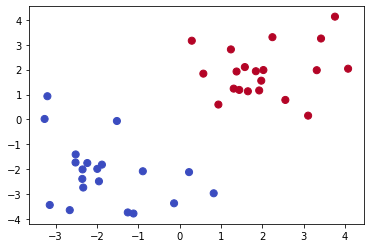

In [168]:
# Data
data1=pd.read_csv('HW2_task1.csv')
X=data1.iloc[:,:2]
Y=data1.iloc[:,2]
plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))
plt.show()

#### a. Report the separating hyperplane (line).

Hyperplace: 0.6632903571403171*X + 0.5635943679453589*Y + 0.043199744249402865 = 0


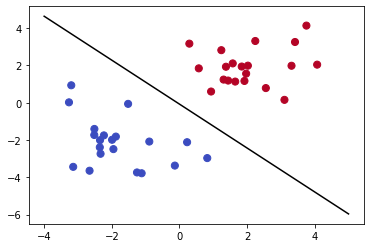

In [169]:
clf = svm.SVC(kernel='linear',C=100000)  
clf.fit(X, Y)

# ax + by = c
# ax - c = -by
# (ax - c)/ -b = y
# (-ax + c)/ b = y
# (-a/b)x + (c/b) = y
# slope = (-a/b)
# intercept = (c/b)
# [a,b] == coefs @[0,1]
# [c]   == intercept @[0]

coefs = clf.coef_[0]
slope = -coefs[0] / coefs[1]
print("Hyperplace: {}*X + {}*Y + {} = 0".format(coefs[0], coefs[1], clf.intercept_[0]))

x1 = np.linspace(-4, 5)
y1 = slope * x1 - (clf.intercept_[0] / coefs[1])

plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))
plt.plot(x1, y1, 'k')
plt.show()

#### b. List the support vectors.

In [170]:
print("The supporting vectors are: \n", clf.support_vectors_)

The supporting vectors are: 
 [[ 0.22627536 -2.11810965]
 [-1.5180363  -0.06399383]
 [ 0.93564585  0.5969359 ]]


#### c. Calculate the upper and lower hyperplanes (lines) of the margin.

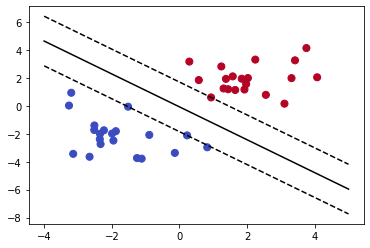

In [171]:
def get_y_vals(x_vals, point, slope):
    x_coor = point[0]
    y_coor = point[1]
    return slope * x_vals + (y_coor - slope * x_coor)

y1_down = get_y_vals(x1, clf.support_vectors_[0], slope)
y1_up = get_y_vals(x1, clf.support_vectors_[-1], slope)

plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))
plt.plot(x1, y1, 'k')
for vect in [clf.support_vectors_[0],clf.support_vectors_[-1]]:
    plt.plot(x1, get_y_vals(x1, vect, slope), 'k--')
plt.show()

#### d. Compute the width of the margin.

In [172]:
# d = |c1-c2| / SQRT(slope^2 + 1)
# c1 = y1 - x1(slope)
point = clf.support_vectors_[0]
c1 = point[1]-(point[0]*slope)
point = clf.support_vectors_[-1]
c2 = point[1]-(point[0]*slope)
d = abs(c1-c2) / (((slope**2)+1)**.5)
print("The width of the margin is: ", d)

The width of the margin is:  2.2986070079527545


#### e. What would you expect to happen to the margin if the constant C was made very small?

 ***We would expect the margin to be much bigger as constant C became very small because the algorithm wouldn't penalize as much for misclassifying some of the points, leading to more points being included as support vectors***

## Task 2 (4+8+8=20 pts)

### Given the dataset provided below, answer the following two questions:

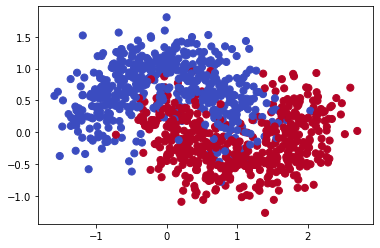

In [173]:
# Data 
data2=pd.read_csv('HW2_task2.csv')
X=data2.iloc[:,:2]
Y=data2.iloc[:,2]

plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));
plt.show()

# Generate training (X_train, Y_train) and testing (X_test, Y_test) datasets for out of sample test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

### a. Train a polynomial SVM using the training set. Use the default arguments, and report both in-sample (training set) and out-of-sample (test set) classification accuracy.

In [174]:
clf = svm.SVC(kernel='poly') 
clf.fit(X_train, Y_train)

print("In-Sample Score: ", clf.score(X_train, Y_train))
print("Out-Sample Score: ", clf.score(X_test, Y_test))

In-Sample Score:  0.8567164179104477
Out-Sample Score:  0.8666666666666667


### Next we will use the validation subset in order to pick the optimal parameters for the polynomial model.

### b. Try polynomials of degree 1,2,3,4. For each degree, consider a variety of regularization constants from the range C=[math.exp(i) for i in np.linspace(-10,2*degree,200)] in order to evaluate the classifier performance over the validation set defined below.  Plot the graph of "Accuracy vs log(C)" for each degree.


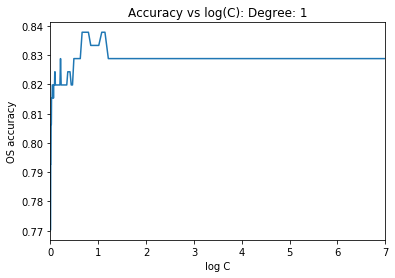

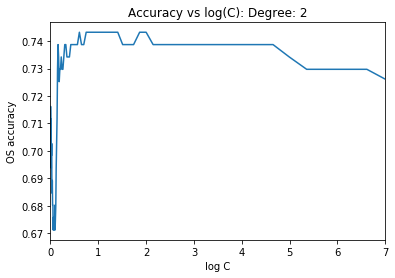

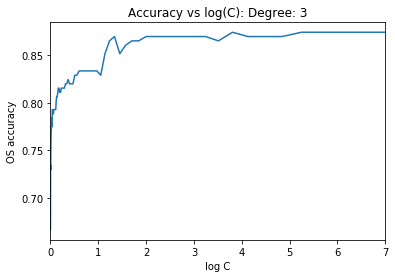

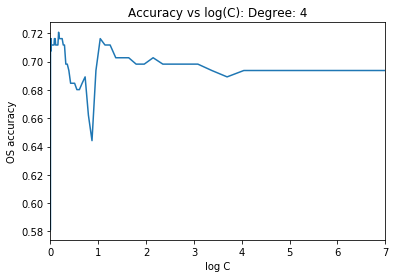

In [175]:
# Next we generate validation data (X_vali, Y_vali) from the training dataset. 
# Denote the remaining training data by (X_train_1, Y_train_1).
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(X_train, Y_train, test_size=0.33, random_state=99)

for degree in [1,2,3,4]:
    OS_scores = []
  
    for C in [math.exp(i) for i in np.linspace(-10,2*degree,200)]:
        clf = svm.SVC(kernel = 'poly',degree= degree, C= C)
        clf.fit(X_train_1, Y_train_1)
        OS_scores.append(clf.score(X_vali, Y_vali))

    plt.gca()
    plt.plot([math.exp(i) for i in np.linspace(-10,2*degree,200)],OS_scores)
    plt.xlabel("log C")
    plt.ylabel("OS accuracy")
    plt.title("Accuracy vs log(C): Degree: {}".format(degree))
    plt.xlim(0,7)
    plt.show()

### c. Choose the optimal degree and the optimal regularization constant C based on these graphs.  Use the optimal degree and C to compute and report the final out-of-sample accuracy of the best classification model selected. 

In [176]:
# your code here

clf = svm.SVC(kernel = 'poly',degree= 3, C = 6)
clf.fit(X_train, Y_train)
print("OS Score (Optimized): ", clf.score(X_test, Y_test))

OS Score (Optimized):  0.8909090909090909


## Task 3 (5+5=10pts).

### This task is to be done by hand rather than using Python.

Assume you have a data set as below. It contains records of cars with three features: the type of the car (sports or SUV), the color of the car (red or yellow), and the origin of the car (domestic or imported). And the labels for the data are yes (car was stolen) and no (car was not stolen).

CarType,Color,Origin,Stolen?

sports,red,domestic,yes

sports,red,domestic,yes

sports,red,domestic,yes

sports,red,domestic,no

SUV,red,domestic,no

SUV,red,imported,yes

SUV,yellow,imported,no

SUV,yellow,imported,yes

SUV,yellow,domestic,no

sports,yellow,imported,no

sports,red,imported,yes


### a) Calculate the following sample probabilities:

P(Yes) = **54.55%**

P(No)  = **45.45%**

P(Red|Yes)  = **83.33%**

P(SUV|Yes)  = **33.33%**

P(Domestic|Yes) = **50.00%**

P(Red|No)   = **40.00%**

P(SUV|No)   = **60.00%**

P(Domestic|No)  = **60.00%**

### b) Using naive Bayes classification, what is the probability that a red, domestic SUV will be stolen? Show your work.

P(y|x1,...,xn) = P(x1|y)*P(x2|y)*...*P(xn|y)*P(y) / P(x1)P(x2)...P(xn)

P(yes|red, domestic, SUV):

= P(red|yes)*P(domestic|yes)*P(SUV|yes)*P(yes) /  (P(red)*P(domestic)*P(SUV))

= (83.33%)*(50.00%)*(33.33%)*(54.55%) / (63.64%) *(54.55%) *(45.45%)

= 48.01%

P(No|red, domestic, SUV):

= P(red|no)* P(domestic|no)* P(SUV|no)* P(no) /  (P(red)*P(domestic)*P(SUV))

= (18.18%)*(27.27.00%)*(27.27%)*(45.45%) / (63.64%) *(54.55%) *(45.45%)

= 41.49%

So the total is: 89.50%, we can rebase our answer

48.01% / 89.50%

Final answer: **P(yes|red, domestic, SUV) = 53.65%**



## Task 4 (4+2+2+2=10pts)

Consider the following problem involving Gaussian Naive Bayes classification.  We use eight factors to predict if people have diabetes or not. The variables are:

y: The label (0 - no diabetes, 1 - diabetes)

t_pre: Number of times pregnant

glu: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

blood_p: Diastolic blood pressure (mm Hg)

triceps: Triceps skin fold thickness (mm)

serum: 2-Hour serum insulin (mu U/ml)

b_m: Body mass index (weight in kg/(height in m)^2)

pedigree_f: Diabetes pedigree function

age: Age (years)

### Using the data provided below, learn a Naive Bayes classifier from the training data and answer the following questions: 

In [177]:
# Training data
data_train=pd.read_csv("HW2_task4_train.csv") 
y_train=data_train.iloc[:,1] 
X_train=data_train.iloc[:,2:] 

# Testing data
data_test=pd.read_csv("HW2_task4_test.csv")
y_test=data_test.iloc[:,1]
X_test=data_test.iloc[:,2:]

print (X_train.head())
print()
print (y_train.head())

   t_pre    glu  blood_p  triceps  serum   b_m  pedigree_f   age
0    3.0  158.0     64.0     13.0  387.0  31.2       0.295  24.0
1    0.0   84.0     64.0     22.0   66.0  35.8       0.545  21.0
2    9.0  120.0     72.0     22.0   56.0  20.8       0.733  48.0
3    4.0  110.0     76.0     20.0  100.0  28.4       0.118  27.0
4    2.0  100.0     66.0     20.0   90.0  32.9       0.867  28.0

0    0.0
1    0.0
2    0.0
3    0.0
4    1.0
Name: y, dtype: float64


### a) What is the prediction accuracy for Naive Bayes, both in sample (on the training data) and out of sample (on the test data)?

In [178]:
def trainGaussianNaiveBayes(X,y):
    prior = (1.*y.sum())/y.count()
    nbc = {'prior':prior}
    X_1 = X.loc[y==1]
    X_0 = X[y==0]
    for j in X.columns:
        nbc[j+'_mu1'] = X_1[j].mean()
        nbc[j+'_sigma1'] = X_1[j].std()
        nbc[j+'_mu0'] = X_0[j].mean()
        nbc[j+'_sigma0'] = X_0[j].std()
    return nbc

def testGaussianNaiveBayes(X,nbc):
    y_pred = pd.Series(index=X.index)
    for i in X.index:
        # compute odds of y=1
        y_pred[i] = nbc['prior']/(1-nbc['prior']) # prior odds
        for j in X.columns:
            thevalue = X.loc[i,j]
            pdf1 = stats.norm.pdf(thevalue,loc=nbc[j+'_mu1'],scale=nbc[j+'_sigma1'])
            pdf0 = stats.norm.pdf(thevalue,loc=nbc[j+'_mu0'],scale=nbc[j+'_sigma0'])
            y_pred[i] = y_pred[i]*pdf1/pdf0 if pdf0 > 0 else 1E10
        # convert odds to probability of y=1
        y_pred[i] = y_pred[i]/(1.0+y_pred[i])
    return y_pred

naive_bayes_classifier = trainGaussianNaiveBayes(X_train,y_train)

y_pred_train = testGaussianNaiveBayes(X_train,naive_bayes_classifier)
y_pred_test = testGaussianNaiveBayes(X_test, naive_bayes_classifier)

# measure accuracy for the binary prediction task
print ('In sample prediction accuracy:',1.0*sum((y_pred_train>0.5)==y_train)/len(y_train))
print ('Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_test)/len(y_test))

C:\Users\erikl\Anaconda2\envs\AppliedDataScience\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In sample prediction accuracy: 0.7627118644067796
Out of sample prediction accuracy: 0.7911392405063291


### b) What is the prior probability of diabetes, learned from the training data?

In [179]:
print("Prior Probability of Diabetes", naive_bayes_classifier['prior'])

Prior Probability of Diabetes 0.3008474576271186


### c) What is the mean and variance of each input variable for patients with diabetes?

In [180]:
print("Means and Variances when Patients have Diabetes(1)")
for col in X_train.columns:
    print(col + " Mean: ", naive_bayes_classifier[col+'_mu1'])
    print(col + " Variance: ", (naive_bayes_classifier[col+'_sigma1'])**2)


Means and Variances when Patients have Diabetes(1)
t_pre Mean:  4.070422535211268
t_pre Variance:  12.380684104627766
glu Mean:  144.14084507042253
glu Variance:  937.979879275654
blood_p Mean:  74.56338028169014
blood_p Variance:  190.4209255533199
triceps Mean:  33.478873239436616
triceps Variance:  95.3102615694165
serum Mean:  209.2112676056338
serum Variance:  16108.940442655934
b_m Mean:  35.22394366197183
b_m Variance:  39.1687042253521
pedigree_f Mean:  0.6390422535211269
pedigree_f Variance:  0.1927578981891348
age Mean:  35.7887323943662
age Variance:  105.34044265593562


### d) What is the mean and variance of each input variable for patients without diabetes?

In [181]:
print("Means and Variances when Patients DONT have Diabetes(0)")
for col in X_train.columns:
    print(col + " Mean: ", naive_bayes_classifier[col+'_mu0'])
    print(col + " Variance: ", (naive_bayes_classifier[col+'_sigma0'])**2)

Means and Variances when Patients DONT have Diabetes(0)
t_pre Mean:  2.690909090909091
t_pre Variance:  6.81241685144124
glu Mean:  111.46666666666667
glu Variance:  609.6894308943089
blood_p Mean:  69.2060606060606
blood_p Variance:  137.2011825572801
triceps Mean:  27.2
triceps Variance:  108.92926829268293
serum Mean:  127.0060606060606
serum Variance:  8369.713377679233
b_m Mean:  31.70909090909091
b_m Variance:  40.16534368070953
pedigree_f Mean:  0.4686848484848485
pedigree_f Variance:  0.0851182537324464
age Mean:  28.393939393939394
age Variance:  72.88654841093866


## Task 5 (10+15=25 pts)

We have an artificial data set split, where the training set contains both labeled and unlabeled data. Column 'y' is the label, and columns '0','1','2' are categorical variables.

In [182]:
data_train=pd.read_csv("HW2_task5_train.csv")
y_Labeled_train=data_train.iloc[:,1] 
X_Labeled_train=data_train.iloc[:,2:] 

data_test=pd.read_csv("HW2_task5_test.csv")
y_Labeled_test=data_test.iloc[:,1]
X_Labeled_test=data_test.iloc[:,2:]

data_Unlabeled=pd.read_csv("HW2_task5_unlabeled.csv")
X_Unlabeled_train=data_Unlabeled.iloc[:,1:]

print (X_Labeled_train)
print( y_Labeled_train)

def trainNaiveBayesDiscrete(X,y):
    prior = 1.*y.sum()/y.count()
    nbc = {'prior':prior}
    X_1 = X[y==1]
    X_0 = X[y==0]
    for j in X.columns:
        nbc[j+'_1'] = X_1[j].value_counts(normalize=True)
        nbc[j+'_0'] = X_0[j].value_counts(normalize=True)
    return nbc

def testNaiveBayesDiscrete(X,nbc):
    y_pred = pd.Series(index=X.index)
    for i in X.index:
        # compute odds of y=1
        y_pred[i] = nbc['prior']/(1-nbc['prior']) # prior odds
        for j in X.columns:
            thevalue = X.loc[i,j]
            if thevalue not in nbc[j+'_1']:
                y_pred[i] = y_pred[i]*1E-3
            if thevalue not in nbc[j+'_0']:
                y_pred[i] = y_pred[i]*1E3
            if (thevalue in nbc[j+'_1']) & (thevalue in nbc[j+'_0']):
                y_pred[i] = y_pred[i]*(nbc[j+'_1'][thevalue]+1E-3)/(nbc[j+'_0'][thevalue]+1E-3)
        # convert odds to probability of y=1
        y_pred[i] = y_pred[i]/(1.0+y_pred[i])
    return y_pred

def initializeNaiveBayesRandom(X_Unlabeled):
    nbc = {'prior':0.5}
    for j in X_Unlabeled.columns:
        thevalues = X_Unlabeled[j].unique()
        nbc[j+'_1'] = {}
        nbc[j+'_0'] = {}
        for jj in thevalues:
            nbc[j+'_1'][jj] = np.random.rand()
            nbc[j+'_0'][jj] = np.random.rand()
    return nbc
    
def EM(X_Labeled,y_Labeled,X_Unlabeled,num_iters):

    # initialize
    
    t = 0
    
    if len(y_Labeled) > 0:
        nbc = trainNaiveBayesDiscrete(X_Labeled,y_Labeled)
    else:
        nbc = initializeNaiveBayesRandom(X_Unlabeled)
    
    while True:
        t = t + 1        
        # E step - classify with nbc for unlabeled data only
        y_pred_Unlabeled = testNaiveBayesDiscrete(X_Unlabeled,nbc)
        
        # M step
        X_for_M_step = pd.concat([X_Labeled,X_Unlabeled], ignore_index=True)
        y_for_M_step = pd.concat([y_Labeled,y_pred_Unlabeled], ignore_index=True)
        prior = 1.*y_for_M_step.sum()/y_for_M_step.count()
        nbc = {'prior':prior}
        for j in X_for_M_step.columns:
            nbc[j+'_1'] = {}
            nbc[j+'_0'] = {}
            for theindex in X_for_M_step.index:
                current_X = X_for_M_step.loc[theindex,j]
                current_y = y_for_M_step.loc[theindex]
                if current_X in nbc[j+'_1']:
                    nbc[j+'_1'][current_X] += current_y
                else:
                    nbc[j+'_1'][current_X] = current_y
                if current_X in nbc[j+'_0']:
                    nbc[j+'_0'][current_X] += (1.0-current_y)
                else:
                    nbc[j+'_0'][current_X] = 1.0-current_y
            # normalize probabilities
            tempsum = 0.0
            for k in nbc[j+'_1']:
                tempsum += nbc[j+'_1'][k]
            for k in nbc[j+'_1']:
                nbc[j+'_1'][k] /= tempsum
            tempsum = 0.0
            for k in nbc[j+'_0']:
                tempsum += nbc[j+'_0'][k]
            for k in nbc[j+'_0']:
                nbc[j+'_0'][k] /= tempsum            
                       
        if t==num_iters:
            break
            
    return nbc

   0  1  2
0  4  6  6
1  2  2  2
2  2  6  2
3  6  6  6
4  1  2  2
5  3  4  4
6  6  1  6
7  1  3  1
8  5  1  6
0    0
1    1
2    0
3    0
4    1
5    0
6    0
7    1
8    1
Name: y, dtype: int64


### a) Learn a discrete Naive Bayes classifier from  X_Labeled_train, use it to predict the labels of X_Labeled_test, and report the classification accuracy.

In [183]:
nbc = trainNaiveBayesDiscrete(X_Labeled_train, y_Labeled_train)

y_pred_train = testNaiveBayesDiscrete(X_Labeled_train, nbc)
y_pred_test = testNaiveBayesDiscrete(X_Labeled_test, nbc)

print( 'In sample prediction accuracy:',1.0*sum((y_pred_train>0.5)==y_Labeled_train)/len(y_Labeled_train))
print ('Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_Labeled_test)/len(y_Labeled_test))

In sample prediction accuracy: 1.0
Out of sample prediction accuracy: 0.6944444444444444


C:\Users\erikl\Anaconda2\envs\AppliedDataScience\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


### b) Improve the classification by using the unlabeled data, data_Unlabeled, and the EM semi-supervised algorithm to predict the labels of X_Labeled_test, and report the new accuracy.

In [184]:
nbc = EM(X_Labeled_train, 
         y_Labeled_train, 
         X_Unlabeled_train, 
         num_iters=50)


y_test_labeled_pred = testNaiveBayesDiscrete(X_Labeled_test,nbc)

# measure accuracy for the binary prediction task
print ('OS accuracy:', 1.0*sum((y_test_labeled_pred>0.5)==y_Labeled_test)/len(y_Labeled_test))


C:\Users\erikl\Anaconda2\envs\AppliedDataScience\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


OS accuracy: 0.9444444444444444
